In [0]:

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

import pylab as plot

In [11]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

**Importing data into Google Colab**

First we need to load the data to Google colab.

The above code allows you to load any data into google colab.

In [62]:

data = pd.read_csv('./train.csv')
print data.shape
data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Importing data (into python environment)**

This step involves importing data from the Google colab to the python script using the library called **Pandas**. Thus making it easier to work with. 

There are many options and features that pandas offer that allows us to get a better idea of the data.

In [63]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Data Description**

The previous Code cell describe the data by pointing out each attribute and the import insights from the data like showing the number of entries for each attribute .

The mean will give the mean of the values of that attribute.
Similarly standard deviation and minimum ,etc for each attribute is listed out to understand the data in a better way.

In [64]:
print("The total number of NaN fields "+str(data['Age'].isnull().sum().sum()))
#data.info()

median_value=float(data['Age'].median())
data['Age']=data['Age'].fillna(median_value)
print("The total number of Nan fields after filling with median "+str(data['Age'].isnull().sum().sum()))

The total number of NaN fields 177
The total number of Nan fields after filling with median 0


**NA Attrocities**

One of the challeges is selecting the data to replace NA in the training data which we are giving as input to the algorithm.

There are many ways of dealing with NaN value
1) replace with something
2) remove the entire row

As we can see in the previous cell output if we are having almost 200 NaN age, so if we remove the row we will be left out with only 600 entries and if we start removing for each of the attributes then there won't be much data left for training.

So it is better to replace it with median or mean of the corresponding column.

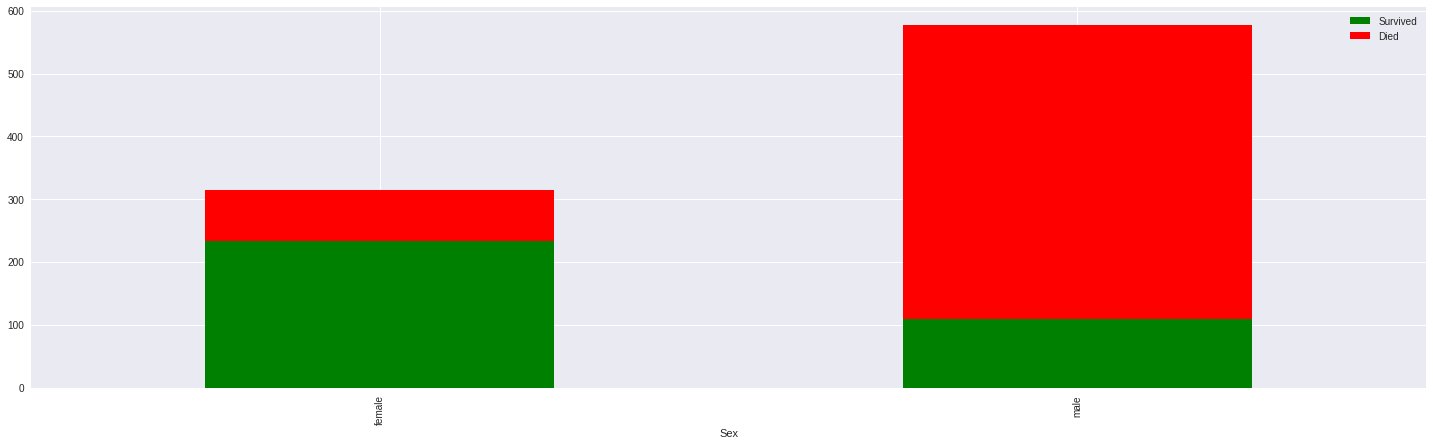

In [65]:
data['Died'] = 1 - data['Survived']
data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True, colors=['g', 'r']);